In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [6]:
workdir = "/Users/joyeuxnoel8/GDrive/Documents/course/CSCI599_DeepLearning/project/datasets/Project"        
os.chdir(workdir)

In [8]:
def loaddata(path, seed=9527):
    """
    Usage: there should be ./breast/ and ./prostate/ under the path
    """
    
    np.random.seed(seed=seed)
    
    def image2tensor(tumor, cnv):
        train1, train2, train3, testset1, testset2, testset3 = [], [], [], [], [], []
        train = [train1, train2, train3] # 3 channels
        test = [testset1, testset2, testset3]

        rawfnames = !ls ./$tumor/$cnv/*jpg
        rawfnames = np.array(np.sort(rawfnames), dtype=object)
        
        # randomly distribute data to train set and test set in 5:1 ratio
        randomIndices = np.random.permutation(rawfnames.shape[0]//3)
                
        for i, rawf in enumerate(rawfnames):
            im = cv2.imread(rawf, 0)
            channel = i % 3            
            if (randomIndices[i//3]) % 6 == 0:
                test[channel].append(im)
            else:
                train[channel].append(im)
                
        return np.array(train).transpose([1,2,3,0]), np.array(test).transpose([1,2,3,0])
    
    tumors = ["breast", "prostate"]
    cnvs = ["altered", "flat"]
    
    trainset,  testset = {"breast" : {}, "prostate" : {}}, {"breast" : {}, "prostate" : {}}
    data = {"trainset" : trainset , "testset" : testset}
    
    for tumor in tumors:
        for i, cnv in enumerate(cnvs):
            if i == 0:
                trainset[tumor]["pos"], testset[tumor]["pos"] = image2tensor(tumor, cnv)
            elif i == 1:
                trainset[tumor]["neg"], testset[tumor]["neg"] = image2tensor(tumor, cnv)
                
    return data

In [9]:
data = loaddata(workdir)

## Breast cancer

In [14]:
# testing set
x_pos_all = data["testset"]["breast"]["pos"]
x_neg_all = data["testset"]["breast"]["neg"]

x_test = np.concatenate((x_pos_all, x_neg_all)).astype('float32')
x_test /= 255
y_test = np.concatenate((np.ones(x_pos_all.shape[0]), np.zeros(x_neg_all.shape[0])))

print(x_test.shape, y_test.shape)

(189, 225, 225, 3) (189,)


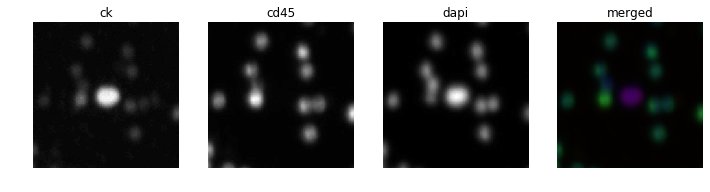

please input your answer as 1 or 0: 1


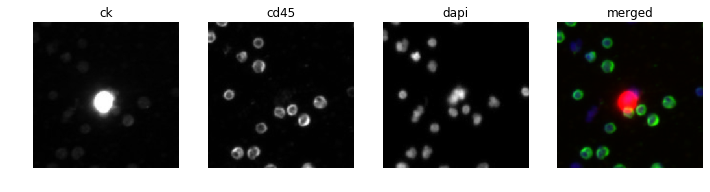

please input your answer as 1 or 0: 1


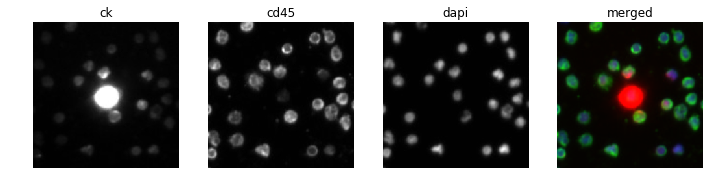

please input your answer as 1 or 0: 1


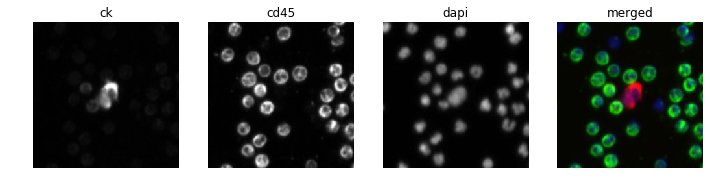

please input your answer as 1 or 0: 1


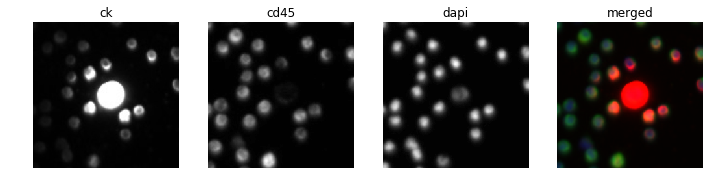

please input your answer as 1 or 0: 1
[-1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [15]:
# np.random.seed(seed=5408)

breastans = np.zeros(x_test.shape[0], dtype=int) - 1
channelorder = np.array([1,0,2])
randind = np.random.permutation(x_test.shape[0])

for i in randind[:5]:
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(12,3))
    ax1.imshow(x_test[i,:,:,1], cmap='gray') # red
    ax1.set_title("ck")
    ax1.axis('off')
    ax2.imshow(x_test[i,:,:,0], cmap='gray') # green
    ax2.set_title("cd45")
    ax2.axis('off')
    ax3.imshow(x_test[i,:,:,2], cmap='gray') # blue
    ax3.set_title("dapi")
    ax3.axis('off')
    ax4.imshow(x_test[i,:,:,channelorder].transpose([1,2,0]), cmap='gray')
    ax4.set_title("merged")
    ax4.axis('off')

    plt.show()
    plt.close()

    tmp = -1
    while tmp not in [0, 1]:
        try:
            tmp = int(input("please input your answer as 1 or 0: "))
        except:
            print("please input 1 or 0")
    breastans[i] = int(tmp)

np.set_printoptions(edgeitems=200)
print(breastans)

In [17]:
print("breast human accuracy: {}".format(np.sum(breastans == y_test)/y_test.shape[0]))

breast human accuracy: 0.015873015873015872


## prostate cancer

In [12]:
# testing set
x_pos_all = data["testset"]["prostate"]["pos"]
x_neg_all = data["testset"]["prostate"]["neg"]

x_test = np.concatenate((x_pos_all, x_neg_all)).astype('float32')
x_test /= 255
y_test = np.concatenate((np.ones(x_pos_all.shape[0]), np.zeros(x_neg_all.shape[0])))

print(x_test.shape, y_test.shape)

(123, 225, 225, 3) (123,)


In [ ]:
# np.random.seed(seed=5408)

prostateans = np.zeros(x_test.shape[0], dtype=int) - 1
channelorder = np.array([1,0,2])
randind = np.random.permutation(x_test.shape[0])

for i in randind[:5]:
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(12,3))
    ax1.imshow(x_test[i,:,:,1], cmap='gray') # red
    ax1.set_title("ck")
    ax1.axis('off')
    ax2.imshow(x_test[i,:,:,0], cmap='gray') # green
    ax2.set_title("cd45")
    ax2.axis('off')
    ax3.imshow(x_test[i,:,:,2], cmap='gray') # blue
    ax3.set_title("dapi")
    ax3.axis('off')
    ax4.imshow(x_test[i,:,:,channelorder].transpose([1,2,0]), cmap='gray')
    ax4.set_title("merged")
    ax4.axis('off')

    plt.show()
    plt.close()

    tmp = -1
    while tmp not in [0, 1]:
        try:
            tmp = int(input("please input your answer as 1 or 0: "))
        except:
            print("please input 1 or 0")
    prostateans[i] = int(tmp)

np.set_printoptions(edgeitems=200)
print(prostateans)

In [ ]:
print("prostate human accuracy: {}".format(np.sum(prostateans == y_test)/y_test.shape[0]))